# Melanoma Detection Assignment - Prasoon Mahawar

# I have used google collab to do this assignment , please replace the path of the data as per your google drive location , I have also renamed the folder to Malenoma_data in Step 1(cell number 3) and in Step 9 (cell number 28)

## Problem statement: 

To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

## Following the Project Pipeline


### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

## Step - 1 :  Data Reading/Data Understanding


In [3]:
# Defining the path for train and test images

data_dir_train = pathlib.Path("/content/drive/MyDrive/Malenoma_data/Train")
data_dir_test = pathlib.Path('/content/drive/MyDrive/Malenoma_data/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


## Step - 2 : Dataset Creation

Let's load these images off disk using the helpful image_dataset_from_directory utility.

In [5]:
# keras.preprocessing was gicing an error as it is deprecated so using keras.utils instead
from tensorflow.keras.utils import load_img

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Using seed=123 while creating your dataset using tf.keras.utils.image_dataset_from_directory
## Train dataset

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Using seed=123 while creating your dataset using tf.keras.utils.image_dataset_from_directory
## Train dataset

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_test,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.
Using 23 files for validation.


In [9]:
# Listing out all the classes of skin cancer and storing them in a list.

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## Step - 3 : Dataset visualisation

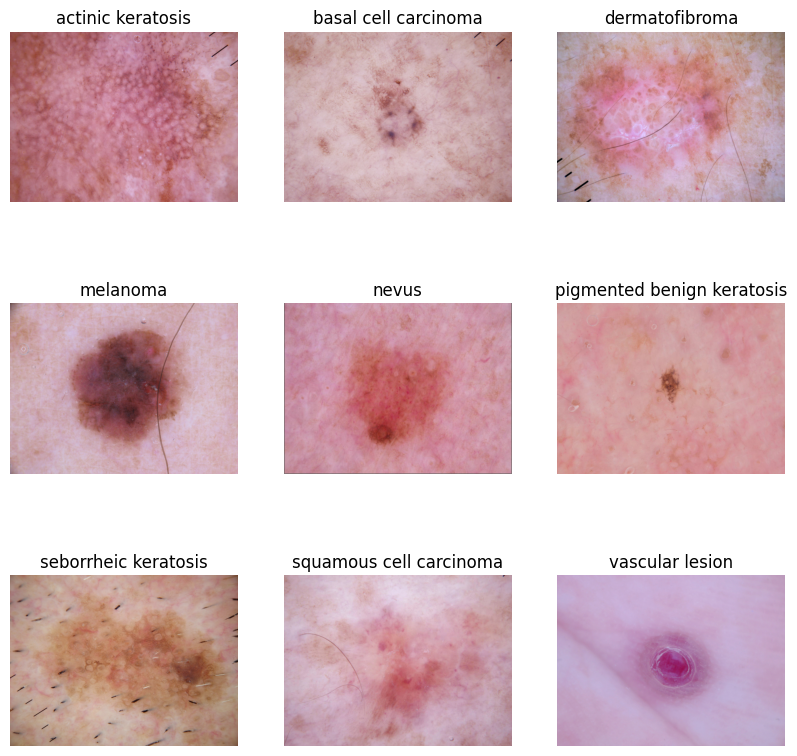

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for disease_type in range(len(class_names)):
    class_path = glob(os.path.join(data_dir_train, class_names[disease_type], '*'))
    disease_imgs = list(class_path)
    img=PIL.Image.open(str(disease_imgs[0]))
    ax = plt.subplot(3,3, disease_type+1)
    plt.imshow(img)
    plt.title(class_names[disease_type])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
cached_train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
cached_val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Step - 4 : Model Building & training

### Creating the model


In [12]:
## Using layers.Rescaling to normalize pixel values between (0,1)
num_classes = 9

model = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

### Compiling the model
Choosing adam optimiser and SparseCategoricalCrossentropy loss function for model training

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
# Viewing the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 32)        9

### Training the model

In [15]:
epochs = 20
history = model.fit(
  cached_train_ds,
  validation_data = cached_val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 229s 129ms/step - loss: 1.9223 - accuracy: 0.2835 - val_loss: 2.4602 - val_accuracy: 0.2174
Epoch 2/20
56/56 [==============================] - 1s 26ms/step - loss: 1.5814 - accuracy: 0.4180 - val_loss: 2.2888 - val_accuracy: 0.3043
Epoch 3/20
56/56 [==============================] - 1s 23ms/step - loss: 1.4825 - accuracy: 0.4771 - val_loss: 2.5398 - val_accuracy: 0.2609
Epoch 4/20
56/56 [==============================] - 1s 24ms/step - loss: 1.3676 - accuracy: 0.5257 - val_loss: 2.8642 - val_accuracy: 0.2174
Epoch 5/20
56/56 [==============================] - 1s 23ms/step - loss: 1.2640 - accuracy: 0.5530 - val_loss: 2.8148 - val_accuracy: 0.2609
Epoch 6/20
56/56 [==============================] - 1s 22ms/step - loss: 1.1561 - accuracy: 0.5871 - val_loss: 3.5058 - val_accuracy: 0.2174
Epoch 7/20
56/56 [==============================] - 1s 22ms/step - loss: 1.1315 - accuracy: 0.5882 - val_loss: 3.8990 - val_accuracy: 0.1739
Epoch 8/20

### Visualizing training results

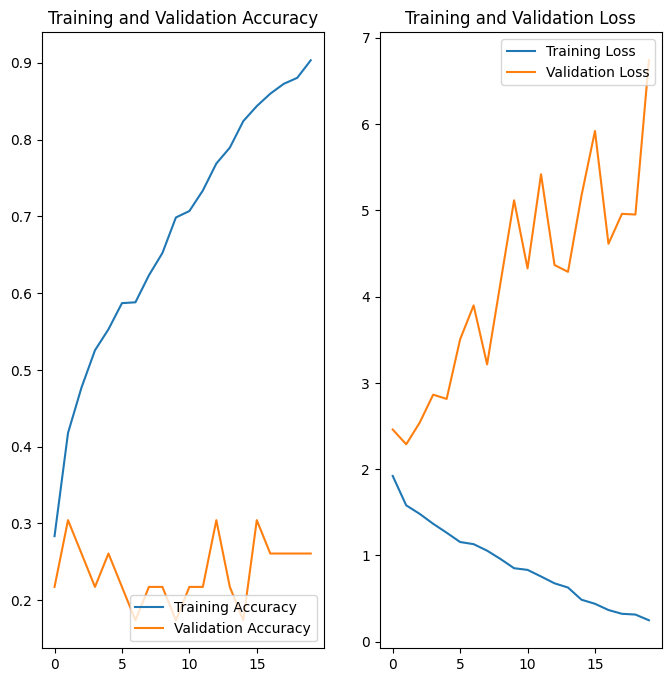

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations

There is clearly evidence of overfitting, with the difference between training accuracy and validation accuracy being greater than 0.5. In addition, as can be observed in the graphs above, as training proceeds, while training loss decreases, validation loss increases.

## Step - 5 : Chosing an appropriate data augmentation strategy to resolve underfitting/overfitting

In [17]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.5),
    layers.RandomContrast(0.5),
    layers.RandomBrightness(0.3),
])

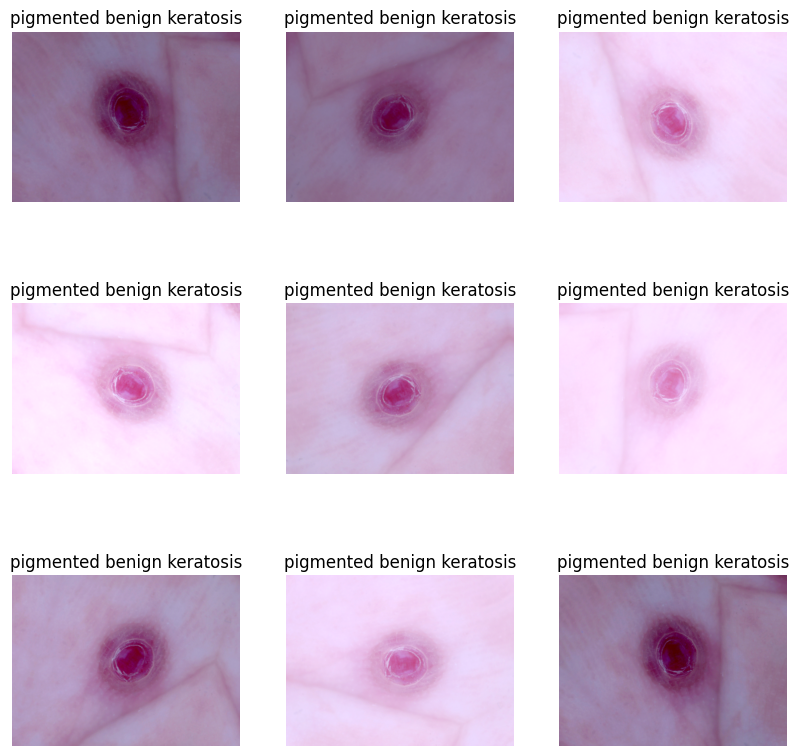

In [18]:
# visualizing how your augmentation strategy works for one instance of training image.

plt.figure(figsize=(10, 10))

for images, labels in cached_train_ds.take(1):
  for i in range(9):
    augmented_image = data_augmentation(img)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image.numpy().astype("uint8"))
    plt.title(class_names[labels[1]])
    plt.axis("off")

## Step - 6 : Model Building & training on the augmented data


In [19]:
## Since there was an evidence of overfitting so using Dropout layer

dropout_conv=0.05
dropout_dense=0.25

model_with_augmentation = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(img_height, img_width, 3)),
    data_augmentation,
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(dropout_conv),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(dropout_conv),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(dropout_conv),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(dropout_dense),
    tf.keras.layers.Dense(num_classes)
])

### Compiling the model

In [20]:
model_with_augmentation.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [21]:
epochs = 20 # As specified in the project pipeline
history = model_with_augmentation.fit(
  cached_train_ds,
  validation_data = cached_val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 6s 50ms/step - loss: 2.0863 - accuracy: 0.2026 - val_loss: 2.2492 - val_accuracy: 0.0000e+00
Epoch 2/20
56/56 [==============================] - 3s 51ms/step - loss: 2.0020 - accuracy: 0.2556 - val_loss: 2.1659 - val_accuracy: 0.1739
Epoch 3/20
56/56 [==============================] - 3s 49ms/step - loss: 1.9227 - accuracy: 0.3025 - val_loss: 2.1727 - val_accuracy: 0.1739
Epoch 4/20
56/56 [==============================] - 3s 48ms/step - loss: 1.8302 - accuracy: 0.3209 - val_loss: 2.0655 - val_accuracy: 0.2174
Epoch 5/20
56/56 [==============================] - 3s 47ms/step - loss: 1.7362 - accuracy: 0.3806 - val_loss: 2.2054 - val_accuracy: 0.2609
Epoch 6/20
56/56 [==============================] - 3s 47ms/step - loss: 1.6511 - accuracy: 0.4018 - val_loss: 2.3744 - val_accuracy: 0.2609
Epoch 7/20
56/56 [==============================] - 3s 49ms/step - loss: 1.6134 - accuracy: 0.4297 - val_loss: 2.6358 - val_accuracy: 0.2609
Epoch 8/2

### Visualizing the results

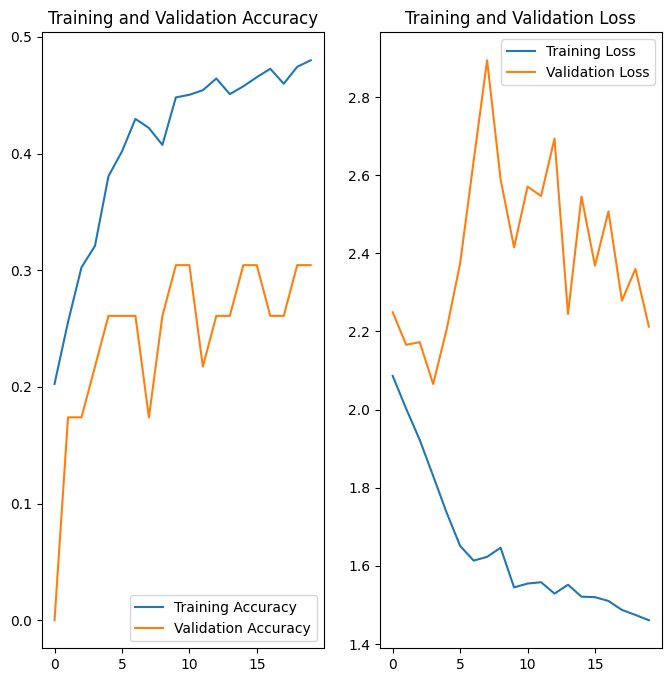

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Performance on the modified model with augmented data

As we can seea after adding augmentation layers and dropouts the model does not perform better on the training data, actually performing significantly worse with accuracy reduced from 0.9035 to 0.4799. The model still performs poorly during inference using the validation set. There is some improvement from accuracy 0.2609 to 0.3043, but the model is still overfitting.

## Step - 7 : Class distribution
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [23]:
dataset_unbatched = tuple(train_ds.unbatch())
labels = []
for (image,label) in dataset_unbatched:
    labels.append(label.numpy())
labels = pd.Series(labels)
# adjustments
count = labels.value_counts().sort_index()
count.index = train_ds.class_names
print(count)

actinic keratosis              92
basal cell carcinoma          309
dermatofibroma                 77
melanoma                      352
nevus                         277
pigmented benign keratosis    370
seborrheic keratosis           58
squamous cell carcinoma       142
vascular lesion               115
dtype: int64


### Examining the Class distribution in training dataset

#### - Which class has the least number of samples?

Seborrheic keratosis has the least number of samples which is 58

#### - Which classes dominate the data in terms proportionate number of samples?

The classes that dominate the data in samples are: pigmented benign keratosis(370), melanoma(352), basal cell carcinoma(309), nevus(277)

## Step - 8 : Handling class imbalances
#### **Context:** We are using a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [24]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [25]:
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(data_dir_train) + '/' + str(i))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Malenoma_data/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B46400FBEB0>: 100%|██████████| 500/500 [00:23<00:00, 21.63 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/Malenoma_data/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B4635F2FEE0>: 100%|██████████| 500/500 [00:25<00:00, 19.57 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/Malenoma_data/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B4640613CA0>: 100%|██████████| 500/500 [00:24<00:00, 20.38 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/Malenoma_data/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7B4635F42E30>: 100%|██████████| 500/500 [01:27<00:00,  5.71 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/Malenoma_data/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7B464B441900>: 100%|██████████| 500/500 [01:43<00:00,  4.85 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/Malenoma_data/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B4640613CA0>: 100%|██████████| 500/500 [00:19<00:00, 25.35 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Malenoma_data/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7B464004B490>: 100%|██████████| 500/500 [00:45<00:00, 11.06 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/Malenoma_data/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B464004B520>: 100%|██████████| 500/500 [00:19<00:00, 25.23 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/Malenoma_data/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7B46400ABA60>: 100%|██████████| 500/500 [00:21<00:00, 23.48 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [26]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


## Step - 9 : Model Building & training on the rectified class imbalance data

In [27]:
batch_size = 32
img_height = 180
img_width = 180

#### Creating a training dataset

In [28]:
data_dir_train=pathlib.Path("/content/drive/MyDrive/Malenoma_data/Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### Creating a validation dataset

In [29]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### Creating the model

In [30]:
num_classes = 9

model_with_class_rebalance = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

#### Compiling the model

In [31]:
model_with_class_rebalance.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Training the model

In [32]:
epochs = 30 # As specified in the project pipeline
history = model_with_class_rebalance.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 62s 342ms/step - loss: 1.8693 - accuracy: 0.2793 - val_loss: 1.6101 - val_accuracy: 0.3801
Epoch 2/30
169/169 [==============================] - 43s 247ms/step - loss: 1.4550 - accuracy: 0.4462 - val_loss: 1.4911 - val_accuracy: 0.4462
Epoch 3/30
169/169 [==============================] - 45s 258ms/step - loss: 1.2190 - accuracy: 0.5471 - val_loss: 1.2804 - val_accuracy: 0.5494
Epoch 4/30
169/169 [==============================] - 42s 244ms/step - loss: 1.0337 - accuracy: 0.6103 - val_loss: 1.0906 - val_accuracy: 0.6169
Epoch 5/30
169/169 [==============================] - 42s 244ms/step - loss: 0.8659 - accuracy: 0.6842 - val_loss: 1.0397 - val_accuracy: 0.6214
Epoch 6/30
169/169 [==============================] - 43s 248ms/step - loss: 0.6940 - accuracy: 0.7528 - val_loss: 0.8563 - val_accuracy: 0.7149
Epoch 7/30
169/169 [==============================] - 43s 250ms/step - loss: 0.5508 - accuracy: 0.8064 - val_loss: 0.8236 - val_ac

#### Visualizing the model results

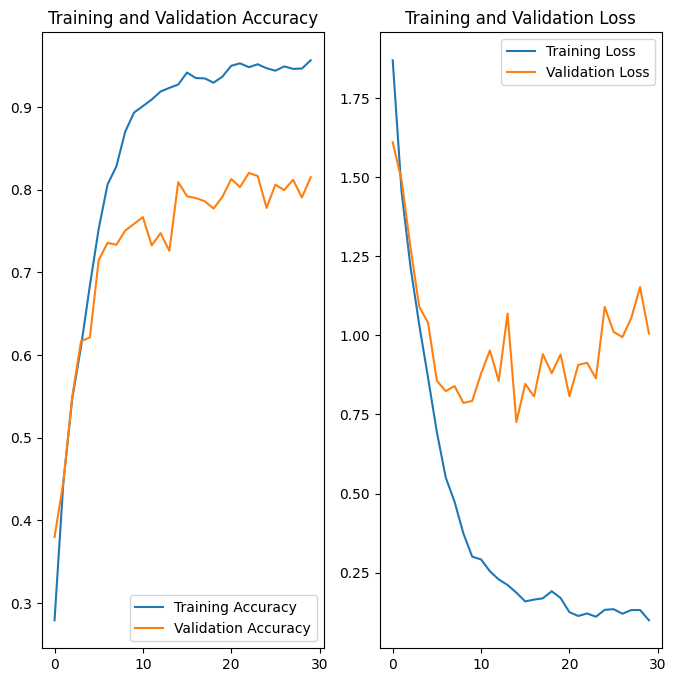

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Results Analysis
The results with dataset augmentation have shown significant improvement over previous models, with training accuracy of 0.9566 at 30 epochs, and validation accuracy at 0.8151. Previously without the data augmentation it was 0.4799 for training and 0.3043 for validation.



## Additional Step: Model Prediction

In [36]:
## Making prediction on test data with model_with_class_rebalance
for className in class_names:

  test_image_dir = os.path.join(data_dir_test, className, '*')
  test_images = glob(test_image_dir)
  for test_image in test_images:
    image = load_img(test_image,target_size=(180,180,3))
    img = np.expand_dims(image,axis=0)
    pred = model_with_class_rebalance.predict(img)
    pred = np.argmax(pred)
    pred_class = class_names[pred]
    print("Actual Class "+ class_names[1] +'\n'+ "Predictive Class "+pred_class )

1/1 [==============================] - 0s 25ms/step
Actual Class basal cell carcinoma
Predictive Class nevus
1/1 [==============================] - 0s 25ms/step
Actual Class basal cell carcinoma
Predictive Class pigmented benign keratosis
1/1 [==============================] - 0s 23ms/step
Actual Class basal cell carcinoma
Predictive Class nevus
1/1 [==============================] - 0s 26ms/step
Actual Class basal cell carcinoma
Predictive Class nevus
1/1 [==============================] - 0s 33ms/step
Actual Class basal cell carcinoma
Predictive Class pigmented benign keratosis
1/1 [==============================] - 0s 24ms/step
Actual Class basal cell carcinoma
Predictive Class pigmented benign keratosis
1/1 [==============================] - 0s 23ms/step
Actual Class basal cell carcinoma
Predictive Class pigmented benign keratosis
1/1 [==============================] - 0s 43ms/step
Actual Class basal cell carcinoma
Predictive Class nevus
1/1 [==============================] - 0s 24